# Análise variação do preço da gasolina

**Objetivo da análise**

Gerar uma tabela com a variação percentural ano a ano do preço médio da gasolina comum no estado do Rio de Janeiro.

**Base de Dados no Kaggle**

[https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil)

# Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a base de Dados

In [2]:
df = pd.read_csv('precos.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])

In [3]:
linhas, colunas = df.shape
print(linhas)
print(colunas)

120823
18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [5]:
df_tratado = df.loc[:, :'PREÇO MÁXIMO REVENDA'].copy()

In [6]:
df_tratado.columns = ['dt_inicial', 'dt_final', 'regiao', 'estado', 'produto',
       'nr_postos_pesquisados', 'unidade_medida',
       'preco_medio_revenda', 'std_revenda', 'preco_min_revenda',
       'preco_max_revenda']

In [7]:
df_tratado

,dt_inicial,dt_final,regiao,estado,produto,nr_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_min_revenda,preco_max_revenda
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400
...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699


## Análises exploratórias iniciais

In [8]:
# Verfificando qtde. de estados
len(df_tratado['estado'].unique())

27

In [9]:
df_tratado['estado'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [10]:
df_tratado['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [11]:
df_tratado['dt_final'].max()

Timestamp('2021-05-01 00:00:00')

## Filtrando o dataset

In [12]:
df_rj = df_tratado.query("estado == 'RIO DE JANEIRO' and produto == 'GASOLINA COMUM'").copy()

In [13]:
df_rj

,dt_inicial,dt_final,regiao,estado,produto,nr_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_min_revenda,preco_max_revenda
12086,2004-05-09,2004-05-15,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.700,2.599
12113,2004-05-16,2004-05-22,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.700,2.599
12140,2004-05-23,2004-05-29,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.700,2.599
12167,2004-05-30,2004-06-05,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.730,2.599
12194,2004-06-06,2004-06-12,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.760,2.599
...,...,...,...,...,...,...,...,...,...,...,...
120003,2021-03-28,2021-04-03,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,276,R$/l,6.102,0.197,5.599,6.559
120181,2021-04-04,2021-04-10,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,275,R$/l,6.007,0.193,5.299,6.499
120360,2021-04-11,2021-04-17,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,261,R$/l,6.016,0.209,5.399,6.516
120538,2021-04-18,2021-04-24,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,240,R$/l,6.071,0.217,5.399,6.599


## Configurando o índice do DataFrame df_rio_gasolina

In [14]:
df_rj.set_index('dt_final', inplace=True)

In [15]:
df_rj

,dt_inicial,regiao,estado,produto,nr_postos_pesquisados,unidade_medida,preco_medio_revenda,std_revenda,preco_min_revenda,preco_max_revenda
dt_final,,,,,,,,,,
2004-05-15,2004-05-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.700,2.599
2004-05-22,2004-05-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.700,2.599
2004-05-29,2004-05-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.700,2.599
2004-06-05,2004-05-30,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.730,2.599
2004-06-12,2004-06-06,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.760,2.599
...,...,...,...,...,...,...,...,...,...,...
2021-04-03,2021-03-28,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,276,R$/l,6.102,0.197,5.599,6.559
2021-04-10,2021-04-04,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,275,R$/l,6.007,0.193,5.299,6.499
2021-04-17,2021-04-11,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,261,R$/l,6.016,0.209,5.399,6.516


In [21]:
datas = []
for i in df_rj.index:
    datas.append((i.year, i.month))

In [23]:
set(datas)

{(2004, 5),
 (2004, 6),
 (2004, 7),
 (2004, 8),
 (2004, 9),
 (2004, 10),
 (2004, 11),
 (2004, 12),
 (2005, 1),
 (2005, 2),
 (2005, 3),
 (2005, 4),
 (2005, 5),
 (2005, 6),
 (2005, 7),
 (2005, 8),
 (2005, 9),
 (2005, 10),
 (2005, 11),
 (2005, 12),
 (2006, 1),
 (2006, 2),
 (2006, 3),
 (2006, 4),
 (2006, 5),
 (2006, 6),
 (2006, 7),
 (2006, 8),
 (2006, 9),
 (2006, 10),
 (2006, 11),
 (2006, 12),
 (2007, 1),
 (2007, 2),
 (2007, 3),
 (2007, 4),
 (2007, 5),
 (2007, 6),
 (2007, 7),
 (2007, 8),
 (2007, 9),
 (2007, 10),
 (2007, 11),
 (2007, 12),
 (2008, 1),
 (2008, 2),
 (2008, 3),
 (2008, 4),
 (2008, 5),
 (2008, 6),
 (2008, 7),
 (2008, 8),
 (2008, 9),
 (2008, 10),
 (2008, 11),
 (2008, 12),
 (2009, 1),
 (2009, 2),
 (2009, 3),
 (2009, 4),
 (2009, 5),
 (2009, 6),
 (2009, 7),
 (2009, 8),
 (2009, 9),
 (2009, 10),
 (2009, 11),
 (2009, 12),
 (2010, 1),
 (2010, 2),
 (2010, 3),
 (2010, 4),
 (2010, 5),
 (2010, 6),
 (2010, 7),
 (2010, 8),
 (2010, 9),
 (2010, 10),
 (2010, 11),
 (2010, 12),
 (2011, 1),
 (2011,

In [26]:
df_rj = df_rj.loc['2005':'2020'].copy()

In [27]:
df_rj.shape

(822, 10)

## Estatísitacas Básicas

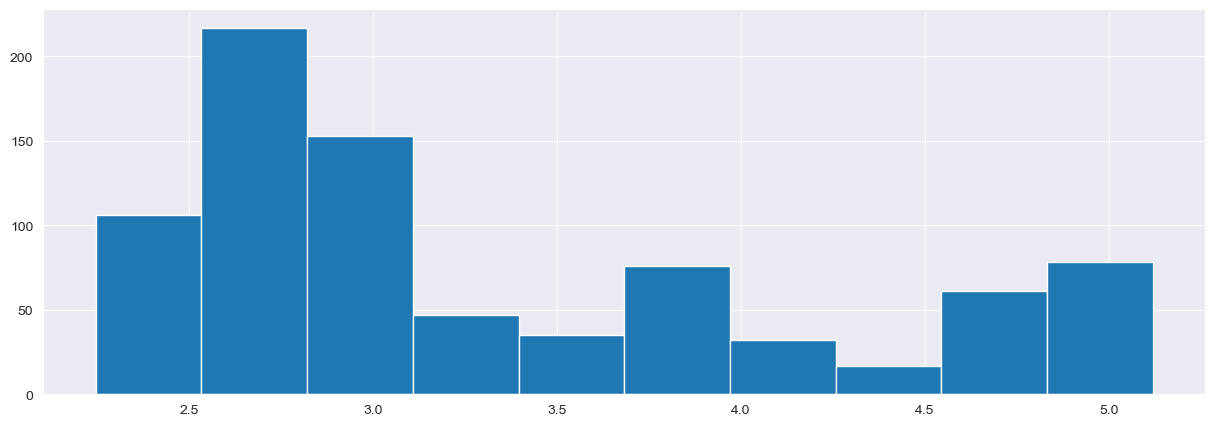

In [66]:
plt.figure(figsize=(15,5))
df_rj['preco_medio_revenda'].hist()
plt.savefig('histograma.png')

In [68]:
sns.set_style('darkgrid')

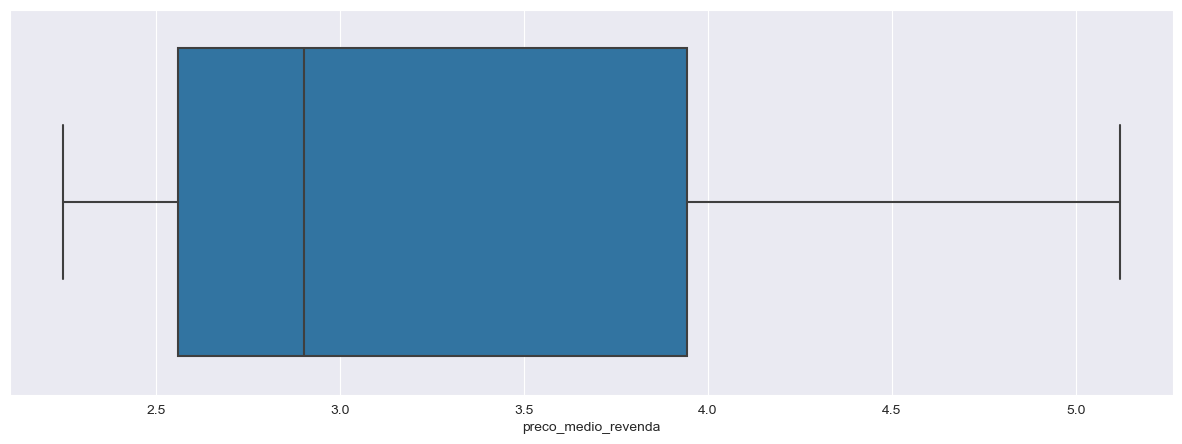

In [70]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_rj, x='preco_medio_revenda')
plt.savefig('boxplot.png')

In [33]:
df_rj['preco_medio_revenda'].describe().round(2)

count    822.00
mean       3.30
std        0.87
min        2.25
25%        2.56
50%        2.90
75%        3.94
max        5.12
Name: preco_medio_revenda, dtype: float64

## Gerando a tabela de variação percentual

In [45]:
df_tabela = df_rj.groupby(df_rj.index.year).agg({
    'preco_medio_revenda': np.mean

})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20352\1492320261.py:1: FutureWarning: The provided callable <function mean at 0x000001711965BA60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_tabela = df_rj.groupby(df_rj.index.year).agg({


In [46]:
df_tabela

,preco_medio_revenda
dt_final,
2005,2.338588
2006,2.561365
2007,2.532077
2008,2.546731
2009,2.564980
2010,2.647788
2011,2.832698
2012,2.852827
2013,2.995442


In [47]:
df_tabela.shift(1)

,preco_medio_revenda
dt_final,
2005,NaN
2006,2.338588
2007,2.561365
2008,2.532077
2009,2.546731
2010,2.564980
2011,2.647788
2012,2.832698
2013,2.852827


In [48]:
df_tabela['valor_last_year'] = df_tabela.shift(1)

In [58]:
df_tabela = df_tabela.loc['2006' :].copy()

In [61]:
df_tabela['variacao%'] = round(((df_tabela['preco_medio_revenda'] / df_tabela['valor_last_year'] - 1))*100,2)

In [57]:
round(((df_tabela['preco_medio_revenda'] / df_tabela['valor_last_year'] - 1))*100,2)

dt_final
2006     9.53
2007    -1.14
2008     0.58
2009     0.72
2010     3.23
2011     6.98
2012     0.71
2013     5.00
2014     4.56
2015    12.94
2016    10.75
2017     4.71
2018    18.35
2019     0.00
2020    -1.93
dtype: float64

In [62]:
df_tabela

,preco_medio_revenda,valor_last_year,variacao%
dt_final,,,
2006,2.561365,2.338588,9.53
2007,2.532077,2.561365,-1.14
2008,2.546731,2.532077,0.58
2009,2.564980,2.546731,0.72
2010,2.647788,2.564980,3.23
2011,2.832698,2.647788,6.98
2012,2.852827,2.832698,0.71
2013,2.995442,2.852827,5.00
2014,3.132115,2.995442,4.56


In [63]:
df_tabela.to_excel('tabela_variacao_gasolina_rj.xlsx')